# BioScripting Lab

### Non coding RNA gene types, their sizes, and biological role

### Submitted by: Hammad Ahmad (FA20-BSI-032)

### Getting the Total No. of ncRNAs

In [1]:
# open the GFF3 file
with open('Homo_sapiens.GRCh38.109.chromosome.21.gff3', 'r') as gff_file:
    # initialize the counters for rna
    mirna_count = 0
    rrna_count = 0
    ncrna_count = 0
    lncrna_count = 0
    snorna_count = 0
    snrna_count = 0
    ncrna_gene_count = 0
    
    # iterate over each line in the file
    for line in gff_file:
        # skip comment lines and empty lines
        if line.startswith('#') or line.strip() == '':
            continue
        
        # split the line into fields
        fields = line.split('\t')
        
        # check if the feature is a miRNA, rRNA, ncRNA, lncRNA, snRNA, snoRNA or ncRNA_gene
        # selecting 3rd filed index because names of rna are present there
        if fields[2] == 'miRNA':
            mirna_count += 1
        elif fields[2] == 'rRNA':
            rrna_count += 1
        elif fields[2] == 'ncRNA':
            ncrna_count += 1
        elif fields[2] == 'lnc_RNA':
            lncrna_count += 1
        elif fields[2] == 'snRNA':
            snorna_count += 1
        elif fields[2] == 'snoRNA':
            snrna_count += 1
        elif fields[2] == 'ncRNA_gene':
            ncrna_gene_count += 1

# print the results
print(f"Total number of miRNA: {mirna_count}")
print(f"Total number of rRNA: {rrna_count}")
print(f"Total number of ncRNA: {ncrna_count}")
print(f"Total number of lncRNA: {lncrna_count}")
print(f"Total number of snRNA: {snorna_count}")
print(f"Total number of snoRNA: {snrna_count}")
print(f"Total number of ncRNA_gene: {ncrna_gene_count}")


Total number of miRNA: 29
Total number of rRNA: 4
Total number of ncRNA: 24
Total number of lncRNA: 1585
Total number of snRNA: 21
Total number of snoRNA: 14
Total number of ncRNA_gene: 447


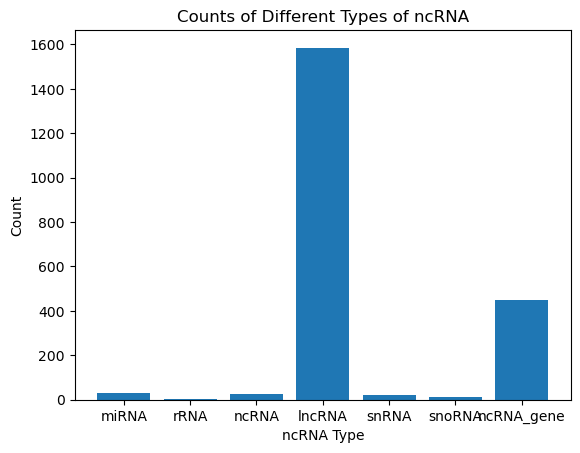

In [2]:
import matplotlib.pyplot as plt

# create a bar graph for each type of RNA
labels = ['miRNA', 'rRNA', 'ncRNA', 'lncRNA', 'snRNA', 'snoRNA', 'ncRNA_gene']
counts = [mirna_count, rrna_count, ncrna_count, lncrna_count, snorna_count, snrna_count, ncrna_gene_count]
plt.bar(labels, counts)
plt.title('Counts of Different Types of ncRNA')
plt.xlabel('ncRNA Type')
plt.ylabel('Count')
plt.show()


# Parsing the ncRNAs

### Reading The GFF3 file

In [3]:
with open('Homo_sapiens.GRCh38.109.chromosome.21.gff3', 'r') as f:
    lines = f.readlines()


## Creating The main function to parse a single line of GFF3 file

In [4]:
def parse_gff3_line(line):
    
    # Split the line by tab character
    fields = line.split('\t')
    
    # Check if there are at least 9 fields (required by GFF3 format)
    if len(fields) < 9:
        return None
    # Create a dictionary with the parsed fields
    return {
        'seqid': fields[0],
        'source': fields[1],
        'type': fields[2],
        'start': int(fields[3]),
        'end': int(fields[4]),
        'score': fields[5],
        'strand': fields[6],
        'phase': fields[7],
        'attributes': dict(field.split('=') for field in fields[8].split(';'))
        # The 'attributes' field is a dictionary created by splitting the 9th field by semicolon and equal sign

    }

# ncRNA

## Biological Role of ncRNA:
ncRNA (non-coding RNA): These are RNA molecules that do not code for proteins. They include lncRNAs, as well as other classes of RNAs such as snRNAs, snoRNAs, and miRNAs. Non-coding RNAs have diverse functions, including gene regulation, splicing, and translation.


In [5]:
# Create an empty list to store ncRNA entries
ncrna_entries = []
for line in lines:
    # Parse the current line using the parse_gff3_line function
    entry = parse_gff3_line(line)
    # Check if the entry is not None and its type is 'ncRNA'
    if entry is not None and entry.get('type') == 'ncRNA':
        # Add the entry to the ncrna_entries list
        ncrna_entries.append(entry)

# Iterate over each ncRNA entry and print it
for entry in ncrna_entries:
    print(entry)


{'seqid': '21', 'source': 'ensembl', 'type': 'ncRNA', 'start': 5597390, 'end': 5597490, 'score': '.', 'strand': '+', 'phase': '.', 'attributes': {'ID': 'transcript:ENST00000610788', 'Parent': 'gene:ENSG00000277777', 'Name': 'Y_RNA.812-201', 'biotype': 'misc_RNA', 'tag': 'basic,Ensembl_canonical', 'transcript_id': 'ENST00000610788', 'transcript_support_level': 'NA', 'version': '1\n'}}
{'seqid': '21', 'source': 'ensembl', 'type': 'ncRNA', 'start': 6223480, 'end': 6223580, 'score': '.', 'strand': '-', 'phase': '.', 'attributes': {'ID': 'transcript:ENST00000616522', 'Parent': 'gene:ENSG00000274790', 'Name': 'Y_RNA.787-201', 'biotype': 'misc_RNA', 'tag': 'basic,Ensembl_canonical', 'transcript_id': 'ENST00000616522', 'transcript_support_level': 'NA', 'version': '1\n'}}
{'seqid': '21', 'source': 'ensembl', 'type': 'ncRNA', 'start': 6365955, 'end': 6366055, 'score': '.', 'strand': '+', 'phase': '.', 'attributes': {'ID': 'transcript:ENST00000615262', 'Parent': 'gene:ENSG00000276902', 'Name': 'Y

In [6]:
# Loop through each ncRNA entry and print its start, end, length, and name (if available)
num = 0
for ncrna in ncrna_entries:
    num += 1 
    start = ncrna['start']
    end = ncrna['end']
    length = end - start
    #if name is available it will print the name otherwise default value will be printed "no name available"
    name = ncrna['attributes'].get('Name', 'no name available')
    print(f"{num}: ncRNA name: {name}, start: {start}, end: {end}, length: {length}")

1: ncRNA name: Y_RNA.812-201, start: 5597390, end: 5597490, length: 100
2: ncRNA name: Y_RNA.787-201, start: 6223480, end: 6223580, length: 100
3: ncRNA name: Y_RNA.804-201, start: 6365955, end: 6366055, length: 100
4: ncRNA name: Y_RNA.780-201, start: 7092616, end: 7092716, length: 100
5: ncRNA name: Y_RNA.784-201, start: 7474394, end: 7474494, length: 100
6: ncRNA name: Y_RNA.801-201, start: 7663911, end: 7664011, length: 100
7: ncRNA name: no name available, start: 8205851, end: 8205940, length: 89
8: ncRNA name: no name available, start: 8250060, end: 8250149, length: 89
9: ncRNA name: no name available, start: 8388898, end: 8388987, length: 89
10: ncRNA name: no name available, start: 8433085, end: 8433174, length: 89
11: ncRNA name: RN7SL52P-201, start: 9902344, end: 9902627, length: 283
12: ncRNA name: no name available, start: 14075950, end: 14076038, length: 88
13: ncRNA name: RN7SL163P-201, start: 17506453, end: 17506728, length: 275
14: ncRNA name: Y_RNA.184-201, start: 1752

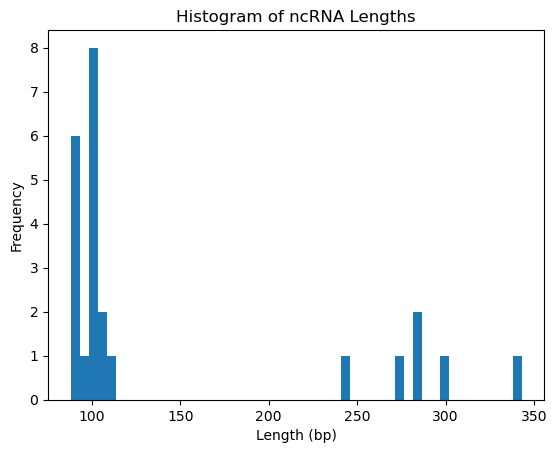

In [7]:
# Create an empty list to store ncRNA lengths
ncrna_lengths = []

for line in lines:
    # Parse the current line using the parse_gff3_line function
    entry = parse_gff3_line(line)
    # Check if the entry is not None and its type is 'ncRNA'
    if entry is not None and entry.get('type') == 'ncRNA':
        # Calculate the length of the ncRNA and add it to the ncrna_lengths list
        ncrna_lengths.append(entry.get('end') - entry.get('start'))

# Create a histogram of the ncRNA lengths
if len(ncrna_lengths) > 0:
    plt.hist(ncrna_lengths, bins=50)
    plt.title("Histogram of ncRNA Lengths")
    plt.xlabel("Length (bp)")
    plt.ylabel("Frequency")
    plt.show()
else:
    print("No ncRNAs found.")


# miRNA

## Biological Role of miRNA:
miRNA (microRNA): These are small RNA molecules that regulate gene expression by binding to messenger RNA (mRNA) and inhibiting its translation into protein. They play a crucial role in many cellular processes, including development, differentiation, and disease.

In [8]:
# Create an empty list to store miRNA entries
mirna_entries = []
for line in lines:
    # Parse the current line using the parse_gff3_line function
    entry = parse_gff3_line(line)
    # Check if the entry is not None and its type is 'ncRNA'
    if entry is not None and entry.get('type') == 'miRNA':
        # Add the entry to the mirna_entries list
        mirna_entries.append(entry)

# Iterate over each miRNA entry and print it
for entry in mirna_entries:
    print(entry)


{'seqid': '21', 'source': 'mirbase', 'type': 'miRNA', 'start': 6859171, 'end': 6859256, 'score': '.', 'strand': '+', 'phase': '.', 'attributes': {'ID': 'transcript:ENST00000616627', 'Parent': 'gene:ENSG00000284550', 'Name': 'hsa-mir-8069-1.1-201', 'biotype': 'miRNA', 'tag': 'basic,Ensembl_canonical', 'transcript_id': 'ENST00000616627', 'transcript_support_level': 'NA', 'version': '1\n'}}
{'seqid': '21', 'source': 'mirbase', 'type': 'miRNA', 'start': 8205315, 'end': 8205406, 'score': '.', 'strand': '+', 'phase': '.', 'attributes': {'ID': 'transcript:ENST00000616420', 'Parent': 'gene:ENSG00000275950', 'Name': 'MIR6724-1-201', 'biotype': 'miRNA', 'tag': 'basic,Ensembl_canonical', 'transcript_id': 'ENST00000616420', 'transcript_support_level': 'NA', 'version': '1\n'}}
{'seqid': '21', 'source': 'mirbase', 'type': 'miRNA', 'start': 8208473, 'end': 8208652, 'score': '.', 'strand': '+', 'phase': '.', 'attributes': {'ID': 'transcript:ENST00000615959', 'Parent': 'gene:ENSG00000275708', 'Name': '

In [9]:
# Loop through each miRNA entry and print its start, end, length, and name (if available)
num = 0
for mirna in mirna_entries:
    num += 1 
    start = mirna['start']
    end = mirna['end']
    length = end - start
    name = mirna['attributes'].get('Name', 'no name available')
    print(f"{num}: miRNA name: {name}, start: {start}, end: {end}, length: {length}")

1: miRNA name: hsa-mir-8069-1.1-201, start: 6859171, end: 6859256, length: 85
2: miRNA name: MIR6724-1-201, start: 8205315, end: 8205406, length: 91
3: miRNA name: MIR3648-1-201, start: 8208473, end: 8208652, length: 179
4: miRNA name: no name available, start: 8208844, end: 8208904, length: 60
5: miRNA name: MIR6724-2-201, start: 8249505, end: 8249596, length: 91
6: miRNA name: MIR6724-3-201, start: 8388362, end: 8388453, length: 91
7: miRNA name: MIR6724-4-201, start: 8432530, end: 8432621, length: 91
8: miRNA name: MIR3648-2-201, start: 8986999, end: 8987178, length: 179
9: miRNA name: no name available, start: 8987370, end: 8987430, length: 60
10: miRNA name: MIR3156-3-201, start: 13406384, end: 13406460, length: 76
11: miRNA name: MIR3118-1-201, start: 13644775, end: 13644850, length: 75
12: miRNA name: MIR8069-201, start: 13724189, end: 13724274, length: 85
13: miRNA name: MIR99A-201, start: 16539089, end: 16539169, length: 80
14: miRNA name: MIRLET7C-201, start: 16539828, end: 1

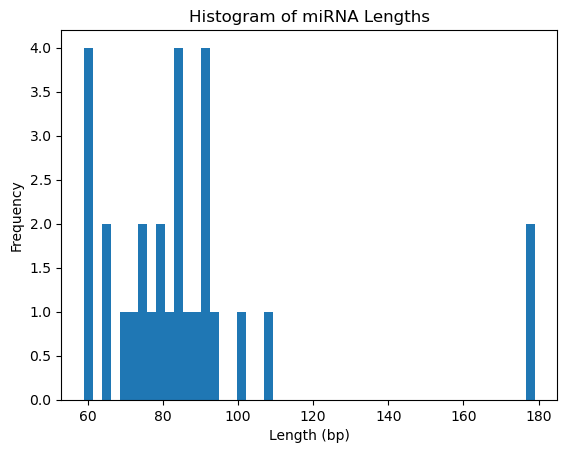

In [10]:
# Create an empty list to store miRNA lengths
mirna_lengths = []

for line in lines:
    # Parse the current line using the parse_gff3_line function
    entry = parse_gff3_line(line)
    # Check if the entry is not None and its type is 'miRNA'
    if entry is not None and entry.get('type') == 'miRNA':
        # Calculate the length of the miRNA and add it to the mirna_lengths list
        mirna_lengths.append(entry.get('end') - entry.get('start'))

# Create a histogram of the miRNA lengths
if len(mirna_lengths) > 0:
    plt.hist(mirna_lengths, bins=50)
    plt.title("Histogram of miRNA Lengths")
    plt.xlabel("Length (bp)")
    plt.ylabel("Frequency")
    plt.show()
else:
    print("No miRNAs found.")


# lncRNA

## Biological Role of lncRNA:
lnc_RNA (long non-coding RNA): These are RNA molecules that are longer than 200 nucleotides and do not code for proteins. They have diverse functions in gene regulation, chromatin modification, and mRNA processing. They have been implicated in many biological processes, including development, differentiation, and disease.

In [11]:
# Create an empty list to store lncRNA entries
lncrna_entries = []

# Iterate over each line in the GFF3 file
for line in lines:
    # Parse the current line using the parse_gff3_line function
    entry = parse_gff3_line(line)
    # Check if the entry is not None and its type is 'lncRNA'
    if entry is not None and entry.get('type') == 'lnc_RNA':
        # Add the entry to the lncrna_entries list
        lncrna_entries.append(entry)

# Iterate over each lncRNA entry and print it
for entry in lncrna_entries:
    print(entry)



{'seqid': '21', 'source': 'havana_tagene', 'type': 'lnc_RNA', 'start': 5086740, 'end': 5087232, 'score': '.', 'strand': '+', 'phase': '.', 'attributes': {'ID': 'transcript:ENST00000701545', 'Parent': 'gene:ENSG00000289905', 'biotype': 'lncRNA', 'tag': 'basic,Ensembl_canonical', 'transcript_id': 'ENST00000701545', 'version': '1\n'}}
{'seqid': '21', 'source': 'havana', 'type': 'lnc_RNA', 'start': 5232668, 'end': 5243833, 'score': '.', 'strand': '-', 'phase': '.', 'attributes': {'ID': 'transcript:ENST00000623753', 'Parent': 'gene:ENSG00000279669', 'biotype': 'lncRNA', 'tag': 'basic,Ensembl_canonical', 'transcript_id': 'ENST00000623753', 'transcript_support_level': '3', 'version': '1\n'}}
{'seqid': '21', 'source': 'havana', 'type': 'lnc_RNA', 'start': 5499151, 'end': 5502542, 'score': '.', 'strand': '-', 'phase': '.', 'attributes': {'ID': 'transcript:ENST00000624261', 'Parent': 'gene:ENSG00000279094', 'Name': 'LINC01670-202', 'biotype': 'lncRNA', 'tag': 'Ensembl_canonical', 'transcript_id'

In [12]:
# Loop through each lncRNA entry and print its start, end, and length
num = 0
for lncrna in lncrna_entries:
    num += 1 
    start = lncrna['start']
    end = lncrna['end']
    length = end - start
    name = lncrna['attributes'].get('Name', 'no name available')
    print(f"{num}: lncRNA name: {name}, start: {start}, end: {end}, length: {length}")

1: lncRNA name: no name available, start: 5086740, end: 5087232, length: 492
2: lncRNA name: no name available, start: 5232668, end: 5243833, length: 11165
3: lncRNA name: LINC01670-202, start: 5499151, end: 5502542, length: 3391
4: lncRNA name: LINC01670-203, start: 5499155, end: 5502497, length: 3342
5: lncRNA name: LINC01670-201, start: 5499557, end: 5502497, length: 2940
6: lncRNA name: no name available, start: 5553637, end: 5590200, length: 36563
7: lncRNA name: no name available, start: 5553659, end: 5590178, length: 36519
8: lncRNA name: no name available, start: 5553669, end: 5590683, length: 37014
9: lncRNA name: no name available, start: 5553669, end: 5591228, length: 37559
10: lncRNA name: no name available, start: 5553679, end: 5588646, length: 34967
11: lncRNA name: no name available, start: 5553703, end: 5614880, length: 61177
12: lncRNA name: no name available, start: 5553707, end: 5586369, length: 32662
13: lncRNA name: no name available, start: 5553710, end: 5588786, 

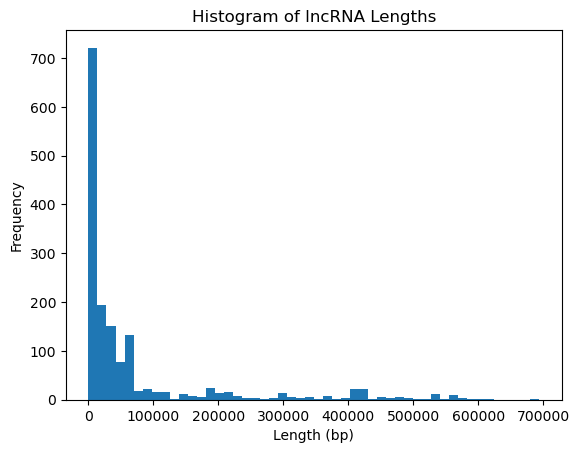

In [13]:
# Create an empty list to store lncRNA lengths
lncrna_lengths = []

for line in lines:
    # Parse the current line using the parse_gff3_line function
    entry = parse_gff3_line(line)
    # Check if the entry is not None and its type is 'lnc_RNA'
    if entry is not None and entry.get('type') == 'lnc_RNA':
        # Calculate the length of the lncRNA and add it to the lncrna_lengths list
        lncrna_lengths.append(entry.get('end') - entry.get('start'))

# Create a histogram of the lncRNA lengths
if len(lncrna_lengths) > 0:
    plt.hist(lncrna_lengths, bins=50)
    plt.title("Histogram of lncRNA Lengths")
    plt.xlabel("Length (bp)")
    plt.ylabel("Frequency")
    plt.show()
else:
    print("No lncRNAs found.")


# rRNA

# Biological Role of rRNA:
miRNA (microRNA): These are small RNA molecules that regulate gene expression by binding to messenger RNA (mRNA) and inhibiting its translation into protein. They play a crucial role in many cellular processes, including development, differentiation, and disease.

In [14]:
# Create an empty list to store rRNA entries
rrna_entries = []

# Iterate over each line in the GFF3 file
for line in lines:
    # Parse the current line using the parse_gff3_line function
    entry = parse_gff3_line(line)
    # Check if the entry is not None and its type is 'rRNA'
    if entry is not None and entry.get('type') == 'rRNA':
        # Add the entry to the rrna_entries list
        rrna_entries.append(entry)

# Iterate over each rRNA entry and print it
for entry in rrna_entries:
    print(entry)


{'seqid': '21', 'source': 'ensembl', 'type': 'rRNA', 'start': 8212572, 'end': 8212724, 'score': '.', 'strand': '+', 'phase': '.', 'attributes': {'ID': 'transcript:ENST00000612463', 'Parent': 'gene:ENSG00000278233', 'Name': 'RNA5-8SN2-201', 'biotype': 'rRNA', 'tag': 'basic,Ensembl_canonical', 'transcript_id': 'ENST00000612463', 'transcript_support_level': 'NA', 'version': '1\n'}}
{'seqid': '21', 'source': 'ensembl', 'type': 'rRNA', 'start': 8256781, 'end': 8256933, 'score': '.', 'strand': '+', 'phase': '.', 'attributes': {'ID': 'transcript:ENST00000610460', 'Parent': 'gene:ENSG00000277739', 'Name': '5_8S_rRNA.5-201', 'biotype': 'rRNA', 'tag': 'basic,Ensembl_canonical', 'transcript_id': 'ENST00000610460', 'transcript_support_level': 'NA', 'version': '1\n'}}
{'seqid': '21', 'source': 'ensembl', 'type': 'rRNA', 'start': 8395607, 'end': 8395759, 'score': '.', 'strand': '+', 'phase': '.', 'attributes': {'ID': 'transcript:ENST00000613359', 'Parent': 'gene:ENSG00000275215', 'Name': 'RNA5-8SN3-

In [15]:
# Loop through each rRNA entry and print its start, end, length, and name (if available)
num = 0
for rrna in rrna_entries:
    num += 1 
    start = rrna['start']
    end = rrna['end']
    length = end - start
    name = rrna['attributes'].get('Name', 'no name available')
    print(f"{num}: rRNA name: {name}, start: {start}, end: {end}, length: {length}")

1: rRNA name: RNA5-8SN2-201, start: 8212572, end: 8212724, length: 152
2: rRNA name: 5_8S_rRNA.5-201, start: 8256781, end: 8256933, length: 152
3: rRNA name: RNA5-8SN3-201, start: 8395607, end: 8395759, length: 152
4: rRNA name: RNA5-8SN1-201, start: 8439823, end: 8439975, length: 152


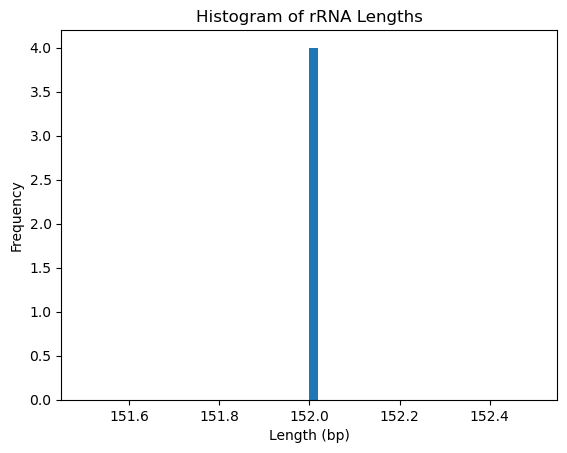

In [16]:
# Create an empty list to store rRNA lengths
rrna_lengths = []

for line in lines:
    # Parse the current line using the parse_gff3_line function
    entry = parse_gff3_line(line)
    # Check if the entry is not None and its type is 'rRNA'
    if entry is not None and entry.get('type') == 'rRNA':
        # Calculate the length of the rRNA and add it to the rrna_lengths list
        rrna_lengths.append(entry.get('end') - entry.get('start'))

# Create a histogram of the rRNA lengths
if len(rrna_lengths) > 0:
    plt.hist(rrna_lengths, bins=50)
    plt.title("Histogram of rRNA Lengths")
    plt.xlabel("Length (bp)")
    plt.ylabel("Frequency")
    plt.show()
else:
    print("No rRNAs found.")


# snRNA 

# Biological Role of snRNA:
snRNA (small nuclear RNA): These are RNA molecules that are involved in splicing, a process by which introns are removed from pre-mRNA and exons are joined together. They are essential for proper gene expression.

In [17]:
# Create an empty list to store snRNA entries
snrna_entries = []

# Iterate over each line in the GFF3 file
for line in lines:
    # Parse the current line using the parse_gff3_line function
    entry = parse_gff3_line(line)
    # Check if the entry is not None and its type is 'snRNA'
    if entry is not None and entry.get('type') == 'snRNA':
        # Add the entry to the snrna_entries list
        snrna_entries.append(entry)

# Iterate over each snRNA entry and print it
for entry in snrna_entries:
    print(entry)


{'seqid': '21', 'source': 'ensembl', 'type': 'snRNA', 'start': 9646825, 'end': 9647000, 'score': '.', 'strand': '+', 'phase': '.', 'attributes': {'ID': 'transcript:ENST00000620684', 'Parent': 'gene:ENSG00000275631', 'Name': 'U1.27-201', 'biotype': 'snRNA', 'tag': 'basic,Ensembl_canonical', 'transcript_id': 'ENST00000620684', 'transcript_support_level': 'NA', 'version': '1\n'}}
{'seqid': '21', 'source': 'ensembl', 'type': 'snRNA', 'start': 13047583, 'end': 13047689, 'score': '.', 'strand': '+', 'phase': '.', 'attributes': {'ID': 'transcript:ENST00000384369', 'Parent': 'gene:ENSG00000207097', 'Name': 'RNU6-614P-201', 'biotype': 'snRNA', 'tag': 'basic,Ensembl_canonical', 'transcript_id': 'ENST00000384369', 'transcript_support_level': 'NA', 'version': '1\n'}}
{'seqid': '21', 'source': 'ensembl', 'type': 'snRNA', 'start': 13621577, 'end': 13621683, 'score': '.', 'strand': '+', 'phase': '.', 'attributes': {'ID': 'transcript:ENST00000384745', 'Parent': 'gene:ENSG00000207476', 'Name': 'RNU6-28

In [18]:
# Loop through each snRNA entry and print its start, end, length, and name (if available)
num = 0
for snrna in snrna_entries:
    num += 1 
    start = snrna['start']
    end = snrna['end']
    length = end - start
    name = snrna['attributes'].get('Name', 'no name available')
    print(f"{num}: snRNA name: {name}, start: {start}, end: {end}, length: {length}")

1: snRNA name: U1.27-201, start: 9646825, end: 9647000, length: 175
2: snRNA name: RNU6-614P-201, start: 13047583, end: 13047689, length: 106
3: snRNA name: RNU6-286P-201, start: 13621577, end: 13621683, length: 106
4: snRNA name: RNU6-954P-201, start: 13968489, end: 13968595, length: 106
5: snRNA name: RNU6-1326P-201, start: 15614283, end: 15614389, length: 106
6: snRNA name: RNU6-426P-201, start: 16035413, end: 16035509, length: 96
7: snRNA name: RNU1-98P-201, start: 16718998, end: 16719157, length: 159
8: snRNA name: RNU6-113P-201, start: 17431547, end: 17431647, length: 100
9: snRNA name: RNU1-139P-201, start: 19345148, end: 19345312, length: 164
10: snRNA name: RNU6-772P-201, start: 20355748, end: 20355852, length: 104
11: snRNA name: RNU4-45P-201, start: 22205192, end: 22205332, length: 140
12: snRNA name: RNU2-55P-201, start: 23281736, end: 23281909, length: 173
13: snRNA name: RNU6-123P-201, start: 25943044, end: 25943145, length: 101
14: snRNA name: RNU6-926P-201, start: 26190

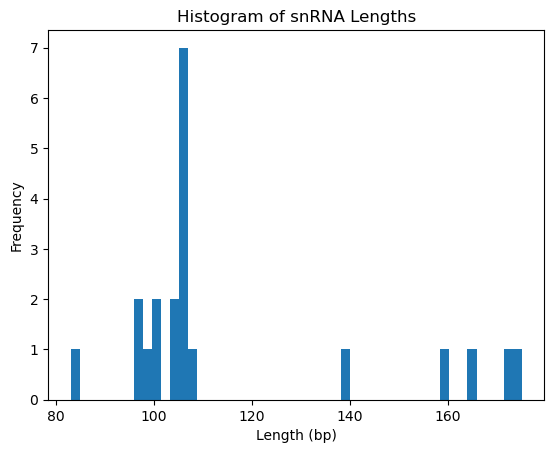

In [19]:
# Create an empty list to store snRNA lengths
snrna_lengths = []

for line in lines:
    # Parse the current line using the parse_gff3_line function
    entry = parse_gff3_line(line)
    # Check if the entry is not None and its type is 'snRNA'
    if entry is not None and entry.get('type') == 'snRNA':
        # Calculate the length of the snRNA and add it to the snrna_lengths list
        snrna_lengths.append(entry.get('end') - entry.get('start'))

# Create a histogram of the snRNA lengths
if len(snrna_lengths) > 0:
    plt.hist(snrna_lengths, bins=50)
    plt.title("Histogram of snRNA Lengths")
    plt.xlabel("Length (bp)")
    plt.ylabel("Frequency")
    plt.show()
else:
    print("No snRNAs found.")

# snoRNA

# Biological Role of snoRNA:
snoRNA (small nucleolar RNA): These are RNA molecules that are involved in modifying other RNAs, particularly ribosomal RNA (rRNA), which is a major component of the ribosome. They play a crucial role in the processing and maturation of rRNA, which is necessary for proper translation of mRNA into protein.

In [20]:
# Create an empty list to store snoRNA entries
sno_entries = []

# Iterate over each line in the GFF3 file
for line in lines:
    # Parse the current line using the parse_gff3_line function
    entry = parse_gff3_line(line)
    # Check if the entry is not None and its type is 'snoRNA'
    if entry is not None and entry.get('type') == 'snoRNA':
        # Add the entry to the sno_entries list
        sno_entries.append(entry)

# Iterate over each snoRNA entry and print it
for entry in sno_entries:
    print(entry)


{'seqid': '21', 'source': 'ensembl', 'type': 'snoRNA', 'start': 9907916, 'end': 9908010, 'score': '.', 'strand': '+', 'phase': '.', 'attributes': {'ID': 'transcript:ENST00000516390', 'Parent': 'gene:ENSG00000252199', 'Name': 'SNORA70.16-201', 'biotype': 'snoRNA', 'tag': 'basic,Ensembl_canonical', 'transcript_id': 'ENST00000516390', 'transcript_support_level': 'NA', 'version': '1\n'}}
{'seqid': '21', 'source': 'ensembl', 'type': 'snoRNA', 'start': 16284696, 'end': 16284768, 'score': '.', 'strand': '-', 'phase': '.', 'attributes': {'ID': 'transcript:ENST00000364155', 'Parent': 'gene:ENSG00000201025', 'Name': 'SNORD74B-201', 'biotype': 'snoRNA', 'tag': 'basic,Ensembl_canonical', 'transcript_id': 'ENST00000364155', 'transcript_support_level': 'NA', 'version': '1\n'}}
{'seqid': '21', 'source': 'ensembl', 'type': 'snoRNA', 'start': 29180425, 'end': 29180639, 'score': '.', 'strand': '-', 'phase': '.', 'attributes': {'ID': 'transcript:ENST00000391177', 'Parent': 'gene:ENSG00000212479', 'Name':

In [21]:
# Loop through each snoRNA entry and print its start, end, length, and name (if available)
num = 0
for snorna in sno_entries:
    num += 1 
    start = snorna['start']
    end = snorna['end']
    length = end - start
    name = snorna['attributes'].get('Name', 'no name available')
    print(f"{num}: snoRNA name: {name}, start: {start}, end: {end}, length: {length}")

1: snoRNA name: SNORA70.16-201, start: 9907916, end: 9908010, length: 94
2: snoRNA name: SNORD74B-201, start: 16284696, end: 16284768, length: 72
3: snoRNA name: U3.23-201, start: 29180425, end: 29180639, length: 214
4: snoRNA name: no name available, start: 31664306, end: 31664482, length: 176
5: snoRNA name: SNORA80A-201, start: 32377187, end: 32377322, length: 135
6: snoRNA name: no name available, start: 32538299, end: 32538434, length: 135
7: snoRNA name: SNORA70.9-201, start: 32841861, end: 32841995, length: 134
8: snoRNA name: no name available, start: 34456110, end: 34456237, length: 127
9: snoRNA name: SNORA62.6-201, start: 38894785, end: 38894867, length: 82
10: snoRNA name: no name available, start: 40513144, end: 40513279, length: 135
11: snoRNA name: no name available, start: 41539206, end: 41539326, length: 120
12: snoRNA name: no name available, start: 41882205, end: 41882300, length: 95
13: snoRNA name: no name available, start: 44437121, end: 44437175, length: 54
14: s

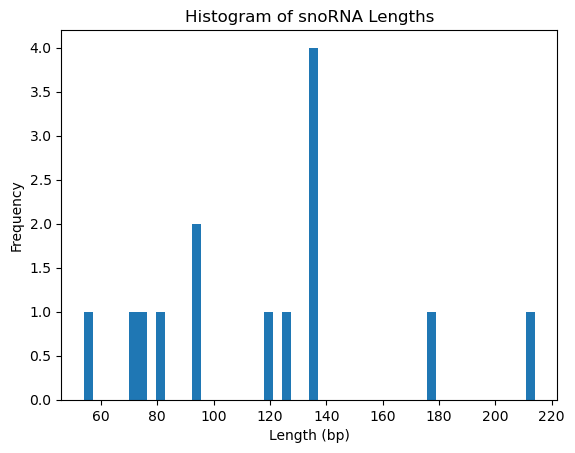

In [22]:
# Create an empty list to store snoRNA lengths
snorna_lengths = []

for line in lines:
    # Parse the current line using the parse_gff3_line function
    entry = parse_gff3_line(line)
    # Check if the entry is not None and its type is 'snoRNA'
    if entry is not None and entry.get('type') == 'snoRNA':
        # Calculate the length of the snoRNA and add it to the snorna_lengths list
        snorna_lengths.append(entry.get('end') - entry.get('start'))

# Create a histogram of the snoRNA lengths
if len(snorna_lengths) > 0:
    plt.hist(snorna_lengths, bins=50)
    plt.title("Histogram of snoRNA Lengths")
    plt.xlabel("Length (bp)")
    plt.ylabel("Frequency")
    plt.show()
else:
    print("No snoRNAs found.")


# ncRNA_gene

# Biological Role of ncRNA_gene:
ncRNA_gene (non-coding RNA gene): This refers to a DNA sequence that codes for a non-coding RNA molecule, such as an lncRNA, snRNA, or snoRNA. These genes play important roles in gene regulation and other cellular processes.

In [23]:
# Create an empty list to store ncRNA_gene entries
ncrna_gene_entries = []

# Iterate over each line in the GFF3 file
for line in lines:
    # Parse the current line using the parse_gff3_line function
    entry = parse_gff3_line(line)
    # Check if the entry is not None and its type is 'ncRNA_gene'
    if entry is not None and entry.get('type') == 'ncRNA_gene':
        # Add the entry to the ncrna_gene_entries list
        ncrna_gene_entries.append(entry)

# Iterate over each ncRNA_gene entry and print it
for entry in ncrna_gene_entries:
    print(entry)


{'seqid': '21', 'source': 'havana_tagene', 'type': 'ncRNA_gene', 'start': 5086740, 'end': 5087232, 'score': '.', 'strand': '+', 'phase': '.', 'attributes': {'ID': 'gene:ENSG00000289905', 'biotype': 'lncRNA', 'description': 'novel transcript', 'gene_id': 'ENSG00000289905', 'logic_name': 'havana_tagene_homo_sapiens', 'version': '1\n'}}
{'seqid': '21', 'source': 'havana', 'type': 'ncRNA_gene', 'start': 5232668, 'end': 5243833, 'score': '.', 'strand': '-', 'phase': '.', 'attributes': {'ID': 'gene:ENSG00000279669', 'biotype': 'lncRNA', 'description': 'novel transcript', 'gene_id': 'ENSG00000279669', 'logic_name': 'havana_homo_sapiens', 'version': '1\n'}}
{'seqid': '21', 'source': 'havana', 'type': 'ncRNA_gene', 'start': 5499151, 'end': 5502542, 'score': '.', 'strand': '-', 'phase': '.', 'attributes': {'ID': 'gene:ENSG00000279094', 'Name': 'LINC01670', 'biotype': 'lncRNA', 'description': 'long intergenic non-protein coding RNA 1670 [Source:HGNC Symbol%3BAcc:HGNC:52458]', 'gene_id': 'ENSG0000

In [24]:
# Loop through each ncRNA_gene entry and print its start, end, length, and name (if available)
num = 0
for ncrna_gene in ncrna_gene_entries:
    num += 1 
    start = ncrna_gene['start']
    end = ncrna_gene['end']
    length = end - start
    name = ncrna_gene['attributes'].get('Name', 'no name available')
    print(f"{num}: ncRNA_gene name: {name}, start: {start}, end: {end}, length: {length}")


1: ncRNA_gene name: no name available, start: 5086740, end: 5087232, length: 492
2: ncRNA_gene name: no name available, start: 5232668, end: 5243833, length: 11165
3: ncRNA_gene name: LINC01670, start: 5499151, end: 5502542, length: 3391
4: ncRNA_gene name: no name available, start: 5553637, end: 5614880, length: 61243
5: ncRNA_gene name: Y_RNA, start: 5597390, end: 5597490, length: 100
6: ncRNA_gene name: no name available, start: 5705345, end: 5707160, length: 1815
7: ncRNA_gene name: no name available, start: 5707004, end: 5709456, length: 2452
8: ncRNA_gene name: no name available, start: 6215291, end: 6217681, length: 2390
9: ncRNA_gene name: Y_RNA, start: 6223480, end: 6223580, length: 100
10: ncRNA_gene name: no name available, start: 6228966, end: 6267317, length: 38351
11: ncRNA_gene name: no name available, start: 6318378, end: 6360415, length: 42037
12: ncRNA_gene name: Y_RNA, start: 6365955, end: 6366055, length: 100
13: ncRNA_gene name: no name available, start: 6630182, e

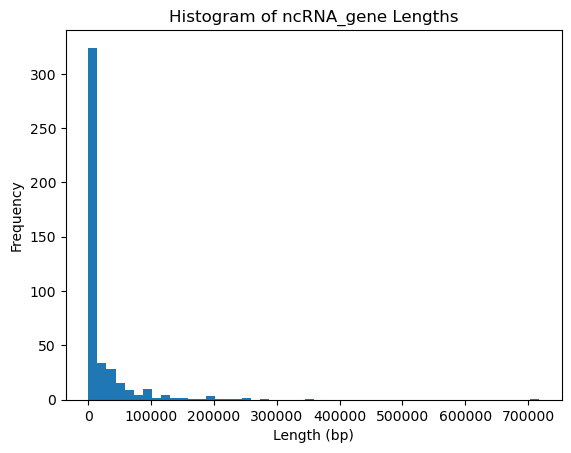

In [25]:
import matplotlib.pyplot as plt

# Create an empty list to store ncRNA_gene lengths
ncrna_gene_lengths = []

for line in lines:
    # Parse the current line using the parse_gff3_line function
    entry = parse_gff3_line(line)
    # Check if the entry is not None and its type is 'ncRNA_gene'
    if entry is not None and entry.get('type') == 'ncRNA_gene':
        # Calculate the length of the ncRNA_gene and add it to the ncrna_gene_lengths list
        ncrna_gene_lengths.append(entry.get('end') - entry.get('start'))

# Create a histogram of the ncRNA_gene lengths
if len(ncrna_gene_lengths) > 0:
    plt.hist(ncrna_gene_lengths, bins=50)
    plt.title("Histogram of ncRNA_gene Lengths")
    plt.xlabel("Length (bp)")
    plt.ylabel("Frequency")
    plt.show()
else:
    print("No ncRNA_genes found.")


### Using A Library BCBIO.gff from BCBIO-nextgen

In [26]:
import pprint
from BCBio.GFF import GFFExaminer

in_file = "Homo_sapiens.GRCh38.109.chromosome.21.gff3"
examiner = GFFExaminer()
in_handle = open(in_file)
pprint.pprint(examiner.available_limits(in_handle))
in_handle.close()

{'gff_id': {('21',): 39870},
 'gff_source': {('.',): 3463,
                ('GRCh38',): 1,
                ('ensembl',): 1444,
                ('ensembl_havana',): 7610,
                ('ensembl_havana_tagene',): 12,
                ('ensembl_tagene',): 5,
                ('havana',): 23663,
                ('havana_tagene',): 3585,
                ('mirbase',): 87},
 'gff_source_type': {('.', 'biological_region'): 3463,
                     ('GRCh38', 'chromosome'): 1,
                     ('ensembl', 'CDS'): 456,
                     ('ensembl', 'exon'): 631,
                     ('ensembl', 'five_prime_UTR'): 80,
                     ('ensembl', 'lnc_RNA'): 9,
                     ('ensembl', 'mRNA'): 46,
                     ('ensembl', 'ncRNA'): 24,
                     ('ensembl', 'ncRNA_gene'): 63,
                     ('ensembl', 'pseudogene'): 6,
                     ('ensembl', 'pseudogenic_transcript'): 6,
                     ('ensembl', 'rRNA'): 4,
                     ('